K-Nearest Neighbors (KNN) Classification Model

In This Notebook, We Will Build A K-Nearest Neighbors (KNN) Classification Model To Predict Whether A Bill Is Genuine or Fake Using Physical Measurements

Dataset: Fake Bills
Target Variable: `is_genuine`
Features: `diagonal`, `height_left`, `height_right`, `margin_low`, `margin_up`, `length`

Step 0: Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from colorama import Fore, Style

Step 1: Importing Data

In [3]:
data = pd.read_csv("../../Data/KNN.csv")
columns = data.columns
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
print(f"{Fore.GREEN}Shape:{Style.RESET_ALL} {data.shape}")

Shape: (1500, 7)


In [5]:
print(Fore.GREEN + "Info:")
print(Style.RESET_ALL)
print(data.info())

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None


In [6]:
print(Fore.GREEN + "Missing Values In The Data:")
print(Style.RESET_ALL)
print(data.isnull().sum())

Missing Values In The Data:

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


Using Simple Imputer To Fill The Null Values

In [7]:
imputer = SimpleImputer(strategy="mean")
data = imputer.fit_transform(data)
df = pd.DataFrame(data, columns=columns)

In [8]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [9]:
df['is_genuine'].value_counts(normalize=True)

is_genuine
1.0    0.666667
0.0    0.333333
Name: proportion, dtype: float64

Step 2: Statistical Summary of The Data

In [10]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.655569,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.030000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.330000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Step 3: Plots

<Axes: xlabel='is_genuine', ylabel='count'>

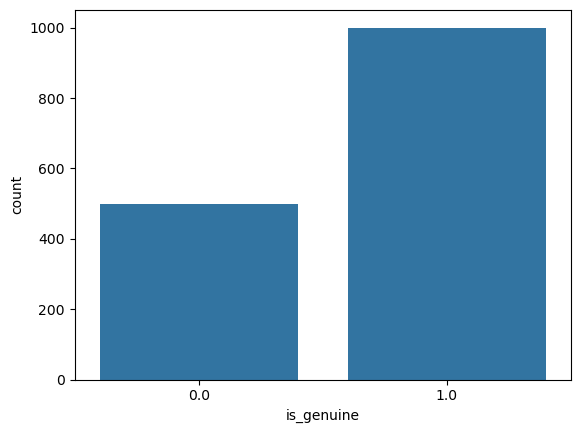

In [11]:
sns.countplot(data=df, x="is_genuine")

Correlation Plot

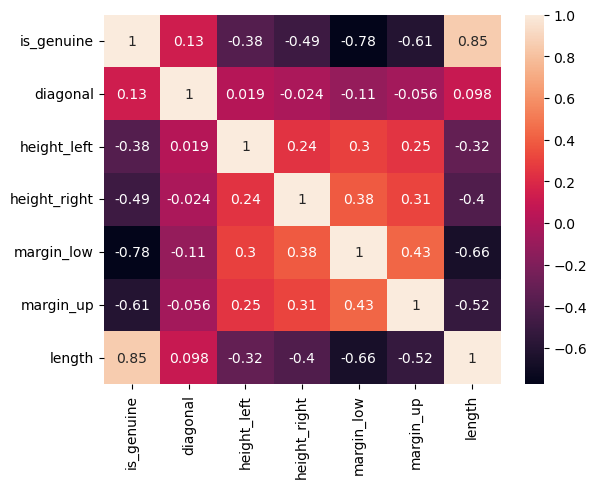

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True);

Step 4: Splitting Data

In [13]:
X = df.drop(columns = 'is_genuine')
y = df['is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [14]:
print(f"{Fore.GREEN}The Shape of X_train Is:{Style.RESET_ALL} {X_train.shape}")
print(f"{Fore.GREEN}The Shape of X_test Is:{Style.RESET_ALL} {X_test.shape}")
print(f"{Fore.GREEN}The Shape of y_train Is:{Style.RESET_ALL} {y_train.shape}")
print(f"{Fore.GREEN}The Shape of y_test Is:{Style.RESET_ALL} {y_test.shape}")

The Shape of X_train Is: (1050, 6)
The Shape of X_test Is: (450, 6)
The Shape of y_train Is: (1050,)
The Shape of y_test Is: (450,)


Step 5: Building The Model

In [15]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

Step 6: Model Evaluation

In [16]:
print(f"{Fore.GREEN}Confusion Matrix:{Style.RESET_ALL}\n{confusion_matrix(y_test, pred)}\n")
print(f"{Fore.GREEN}Classification Report:{Style.RESET_ALL}\n{classification_report(y_test, pred)}\n")
print(f"{Fore.GREEN}Accuracy:{Style.RESET_ALL} {accuracy_score(y_test, pred):.4f}")

Confusion Matrix:
[[156   5]
 [  2 287]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       161
         1.0       0.98      0.99      0.99       289

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450


Accuracy: 0.9844


Using Elbow Method To Find A Better Value of n_neigbors

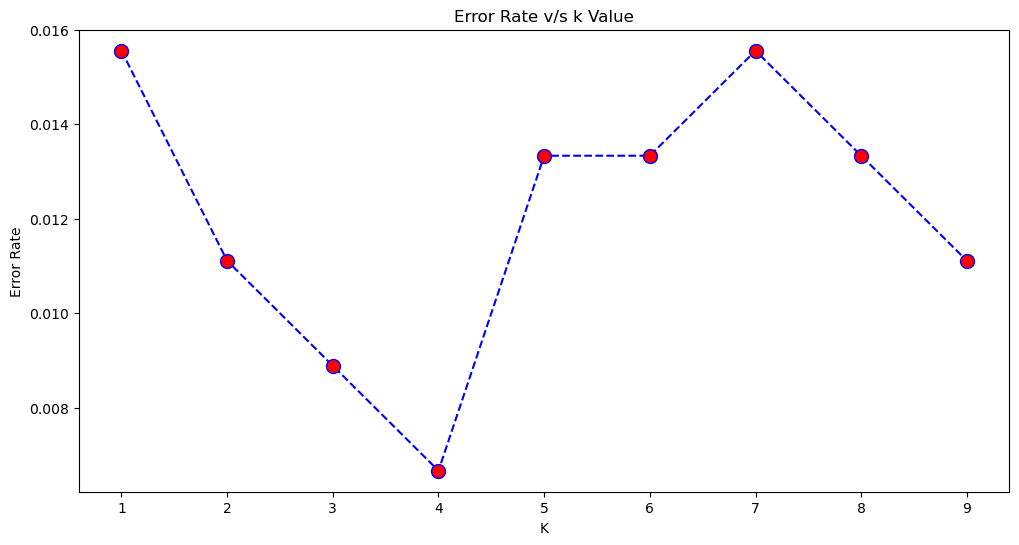

In [17]:
error_rate = []

for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
plt.title('Error Rate v/s k Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

From The Graph We Can See That n_neighbors=4 The Error Rate Is Minimum. So We Gonna Use It To Improve Our Model

In [18]:
model = KNeighborsClassifier(n_neighbors = 4)
 
model.fit(X_train, y_train)
pred = model.predict(X_test)
 
print(f"WITH K = 4\n")
print(f"{Fore.GREEN}Confusion Matrix{Style.RESET_ALL}")
print(confusion_matrix(y_test, pred))
print(f"{Fore.GREEN}Classification Report{Style.RESET_ALL}")
print(classification_report(y_test, pred))
print(f"{Fore.GREEN}Accuracy Score{Style.RESET_ALL}")
print(accuracy_score(y_test, pred))

WITH K = 4

Confusion Matrix
[[159   2]
 [  1 288]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       161
         1.0       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

Accuracy Score
0.9933333333333333
